In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clustering-penguins-species/penguins.csv


In [2]:
dataset=pd.read_csv('/kaggle/input/clustering-penguins-species/penguins.csv')

In [3]:
dataset.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
dataset=dataset.drop('sex',axis=1).dropna()

In [5]:
dataset.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = dataset.columns
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [8]:
dataset.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-0.126893,-0.564142
1,-0.811126,0.126188,-0.107675,-0.501703
2,-0.664380,0.430462,-0.073083,-1.188532
4,-1.324737,1.089724,-0.080771,-0.938776
5,-0.847812,1.748985,-0.092301,-0.689020


In [9]:
from sklearn.cluster import KMeans

In [10]:
from matplotlib import pyplot as plt

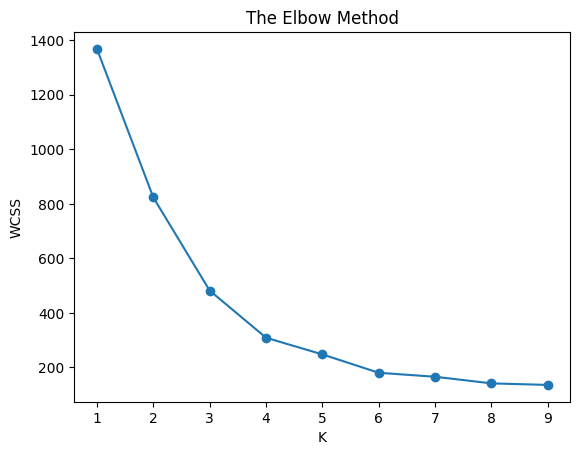

In [11]:
wcss = [] #within-cluster-sum-of-squares.
for i in range(1,10):
    km_cluster_test = KMeans(n_clusters=i,n_init='auto',max_iter=1000,random_state=42,copy_x=True,
                   algorithm='lloyd')
    wcss.append([i, km_cluster_test.fit(dataset).inertia_])
wcss = np.array(wcss).reshape(-1,2)

plt.plot(wcss[:,0], wcss[:,1], marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.show()

In [12]:
km_cluster = KMeans(n_clusters=4,n_init='auto',max_iter=1000,random_state=42,copy_x=True,
                   algorithm='lloyd')

In [13]:
species = km_cluster.fit_predict(dataset)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca_components = PCA(n_components=2,copy=True).fit_transform(dataset)

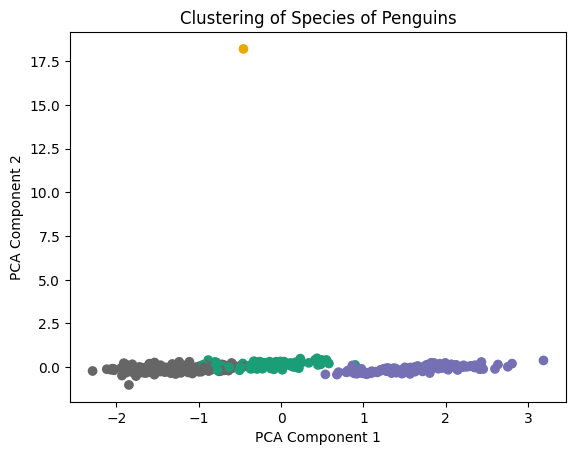

In [16]:
plt.scatter(pca_components[:,0], pca_components[:,1], c=species, cmap='Dark2');
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering of Species of Penguins')
plt.show()